# Explore explosive nucleosynthesis
The usual nugridse tools allow analysis and plotting of the explosive nucleosynthesis as well.

## How ipython notebooks work

If you have never used an ipython notebook, then here are the few basic rules you need to know:

* each cell is a block of code or comments (in markdown, see pull-down menu above)
* in each cell you can edit code, several lines using the `Return` key to create a newline
* once you are happy with a block of code use the _play_ button above, or just hit `Shift`-`Return` to execute the block of code
* in this notebook you use the [NuGridPy tools](http://nugridpy.phys.uvic.ca) to analyze data, [latest version on Github](https://github.com/NuGrid/NuGridPy) 

## Initialize session

In [1]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2/"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## The MESA stellar evolution model
Initialise the 2 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [2]:
s=ms.star_log(mass=20,Z=0.02)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 20.0
Using old star.logsa file ...
 reading ...100% 



Let's now see what the model looks like by making some Kippenhahn diagrams

In [ ]:
ifig=111;close(ifig);figure(ifig)
s.kippenhahn_CO(111,'model')

What's happening at the centre of the star? ...

In [ ]:
ifig=101;close(ifig);figure(ifig)
s.tcrhoc()
axis([0,7,7,8.5])

... and at the surface?

In [ ]:
ifig=102;close(ifig);figure(ifig)
s.hrd_new()
legend(loc='lower right').draw_frame(False)

<IPython.core.display.Javascript object>


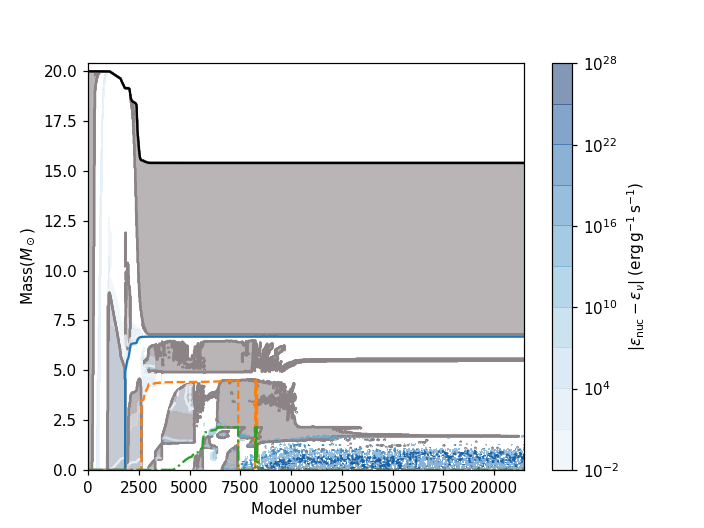

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours


/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1518: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


plotting patches
plotting abund boundaries


In [3]:
ifig=107;close(ifig);figure(ifig)
s.kip_cont(ifig=ifig)

Now that we have an overview of the stellar evolution of this $2M_\odot$ star let's have a closer look at the nucleosynthesis.

## The NuGrid post-processing model
Initialise the 20 solar-mass Z=0.02 NuGrid nucleosynthesis data from set1.2 using the seeker method:

In [11]:
# this is where the data physically is located, and these are for each M/Z combinations the available data types
%ls /data/nugrid_apod2/data/set1ext/set1.1/

ppd_exp/  ppd_exp_yemcut/  ppd_wind/  see_exp/  see_exp_yemcut/  see_wind/


In [10]:
mp.se?

In [4]:
# to load the explosion data use ppd_exp data type, and select an explosion type
pt=mp.se(mass=20,Z=0.02,type='ppd_exp', exp_type='delay')

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 20.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


In [6]:
# load the available cycles
ppd_exp_cycs = pt.se.cycles

In [9]:
# The first available cycle 
ppd_exp_cycs[0]

'0000021001'

In [10]:
# ifig=111;figure(ifig)
# this is not overplotting as we want
# pt.plot('mass','temperature',fname=ppd_exp_cycs[1:-1:50],path='/home/user/notebooks')
cycle=0
mass = pt.get(ppd_exp_cycs[cycle],'mass')
rho = pt.get(ppd_exp_cycs[cycle],'rho')
temperature = pt.get(ppd_exp_cycs[cycle],'temperature')

 reading ['temperature']...100%

<IPython.core.display.Javascript object>


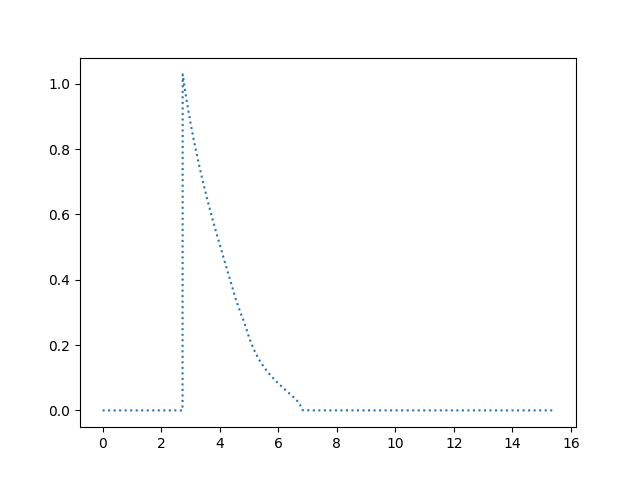

In [11]:
figure(111) 
plot(mass,temperature,':')

### Abundance profiles 

In [ ]:
# pt.abu_profile?

<IPython.core.display.Javascript object>


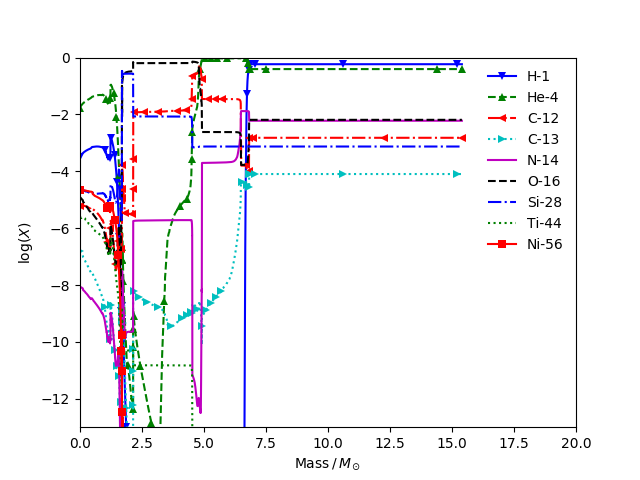

 reading ['iso_massf']...100%

(0.0, 20.0)

In [12]:
species=['H-1','He-4','C-12','C-13','N-14','O-16','Si-28','Ti-44','Ni-56']
ifig=108;close(ifig);figure(ifig)
pt.abu_profile(isos=species, ifig=ifig, fname=ppd_exp_cycs[cycle], logy=True)
ylim(-13,0)
xlim(0.,20.)

#### Abundance profile at the time of formation of the partial-mix zone

### Isotopic abundance distribution

#### Static plots



In [ ]:
# help
#pt.iso_abund?

In [17]:
mmin = 1.7
mmax = 2.3

<IPython.core.display.Javascript object>


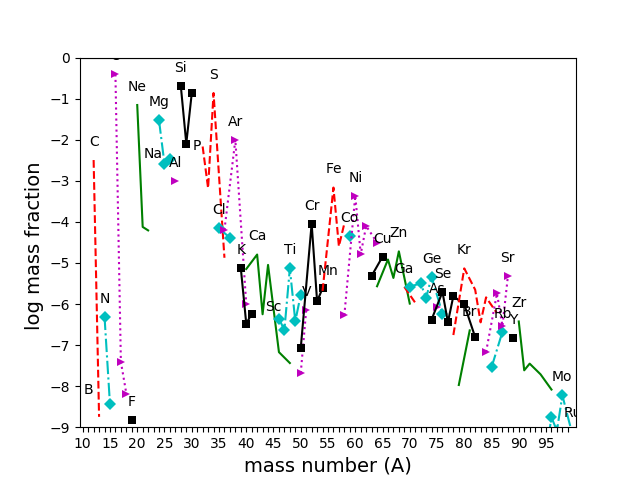

 reading ['mass']...100%.100%Using the following conditions:
	mass_range: 1.7 2.3
	Atomic mass_range: 10 100
	cycle:            0000021001
	plot only stable: True
	plot decayed:     False


In [18]:
ifig=123;close(ifig);figure(ifig)
pt.iso_abund(ppd_exp_cycs[cycle], stable=True,amass_range=[10,100], mass_range=[mmin,mmax], ylim=[-9, 0])

### Abundance chart plot
We can also see the impact on the isotopic abundance chart for that part of the star:

In [ ]:
# pt.abu_chart?

 reading ['mass']...100%.100%

<IPython.core.display.Javascript object>


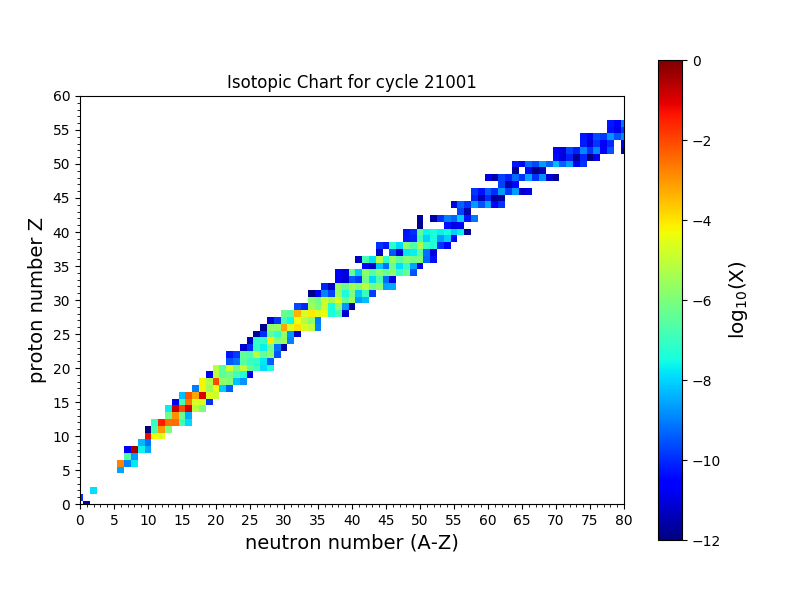

In [19]:
#ifig=1233;close(ifig);figure(ifig)
pt.abu_chart(ppd_exp_cycs[cycle],mass_range=[mmin,mmax], plotaxis=[0, 80, 0, 60],\
             ilabel=False,imlabel=False,boxstable=False)
